# Exploratory Data Analysis and Feature Engineering
Sumudu Tennakoon, PhD

To learn more about Python, refeer to the following websites

* Python : www.python.org
* W3Schools : www.w3schools.com/python

To learn more about the Python packages we explore in this notebook, refeer to the following websites

* NumPy : www.numpy.org
* Matplotlib : www.matplotlib.org
* Pandas : https://pandas.pydata.org
* Scikit-Learn : https://scikit-learn.org/
* Seaborn: https://seaborn.pydata.org/
* StatsModel : https://www.statsmodels.org

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
file_name = 'https://raw.githubusercontent.com/SumuduTennakoon/MLFoundations/main/Datasets/income_data.csv'

# Load CSV File
data = pd.read_csv(file_name)
data.sample(20)

,Unnamed: 0,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
4002,4002,28,Private,157391,Bachelors,13,Never-married,Sales,Own-child,White,Female,0.0,0.0,40.0,United-States,<=50K
28668,3850,34,Private,217652,12th,8,Divorced,Machine-op-inspct,Own-child,White,Female,0.0,0.0,40.0,United-States,<=50K.
25732,914,30,Private,169002,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
28211,3393,40,Private,210857,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,1902.0,50.0,United-States,>50K.
11238,11241,46,Private,288608,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
21392,21402,62,Self-emp-inc,236096,HS-grad,9,Divorced,Exec-managerial,Not-in-family,Black,Male,0.0,0.0,40.0,United-States,<=50K
8694,8696,33,Private,196385,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,37.0,United-States,>50K
4605,4605,22,Private,201799,HS-grad,9,Never-married,Sales,Own-child,White,Female,0.0,0.0,40.0,United-States,<=50K
7036,7038,19,Private,206874,Assoc-voc,11,Never-married,Adm-clerical,Own-child,Black,Female,0.0,0.0,40.0,United-States,<=50K
35571,10753,36,Self-emp-not-inc,193026,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0.0,0.0,60.0,United-States,<=50K.


In [3]:
data.shape

(41095, 16)

In [4]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,41095,NaN,NaN,NaN,10721,6645.18,0,5138,10275,15415,24833
age,41095,NaN,NaN,NaN,38.6694,13.7482,17,28,37,48,90
workclass,41095,9,Private,28451,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,41095,NaN,NaN,NaN,189652,105500,12285,117587,178109,237564,1.4904e+06
education,41095,16,HS-grad,13345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_num,41095,NaN,NaN,NaN,10.0794,2.56091,1,9,10,12,16
marital_status,41095,7,Married-civ-spouse,18770,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,41095,15,Prof-specialty,5193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,41095,6,Husband,16520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,41095,5,White,35180,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,41095.0,10721.025940,6645.180596,0.0,5138.0,10275.0,15415.0,24833.0
age,41095.0,38.669425,13.748164,17.0,28.0,37.0,48.0,90.0
fnlwgt,41095.0,189652.134737,105499.712269,12285.0,117587.0,178109.0,237563.5,1490400.0
education_num,41095.0,10.079353,2.560906,1.0,9.0,10.0,12.0,16.0
capital_gain,41094.0,1085.012581,7509.925734,0.0,0.0,0.0,0.0,99999.0
capital_loss,41094.0,86.899134,401.668898,0.0,0.0,0.0,0.0,4356.0
hours_per_week,41094.0,40.404585,12.371882,1.0,40.0,40.0,45.0,99.0


In [6]:
data.columns

Index(['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education_num', 'marital_status', 'occupation', 'relationship', 'race',
       'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
       'native_country', 'class'],
      dtype='object')

In [7]:
data.dtypes

Unnamed: 0          int64
age                 int64
workclass          object
fnlwgt              int64
education          object
education_num       int64
marital_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain      float64
capital_loss      float64
hours_per_week    float64
native_country     object
class              object
dtype: object

# Drop Unnecessary Columns

In [8]:
data.drop(labels='Unnamed: 0', axis=1, inplace=True)

In [9]:
data.drop(labels=1, axis=0)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41090,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
41091,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
41092,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
41093,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


In [10]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


# Quering Data

In [11]:
data.query("age < 60 and age > 30")

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41089,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K.
41090,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
41092,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
41093,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


## Create Subset of DataFrame macthing a condition

In [12]:
data_age_90 = data.query("age==90")

In [13]:
data_age_90.shape

(48, 15)

## Create a New Column exlauating Logical Expression

In [14]:
data['is_age_gt_30'] = data['age']>30
data[['age','is_age_gt_30']].head()

,age,is_age_gt_30
0,39,True
1,50,True
2,38,True
3,53,True
4,28,False


In [15]:
data.loc[data['age']==90].head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,is_age_gt_30
222,90,Private,51744,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0.0,2206.0,40.0,United-States,<=50K,True
1040,90,Private,137018,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K,True
1935,90,Private,221832,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,<=50K,True
2303,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0.0,0.0,35.0,United-States,<=50K,True
2891,90,Private,171956,Some-college,10,Separated,Adm-clerical,Own-child,White,Female,0.0,0.0,40.0,Puerto-Rico,<=50K,True


# Drop Rows with Missing Values

In [16]:
data['class'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
41090    False
41091    False
41092    False
41093    False
41094    False
Name: class, Length: 41095, dtype: bool

In [17]:
data.loc[data['class'].isna()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,is_age_gt_30
24818,25,Private,283515,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Mal,NaN,NaN,NaN,NaN,NaN,False


In [18]:
# Numpy NaN
a = np.NaN

In [19]:
data.dropna(how='any', axis=0, inplace=True)

In [20]:
data.loc[data['class'].isna()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,is_age_gt_30


In [21]:
data.shape

(41094, 16)

# Create Unique ID 

In [22]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,is_age_gt_30
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K,True
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K,True
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,True
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K,True
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K,False


In [23]:
data.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            41085, 41086, 41087, 41088, 41089, 41090, 41091, 41092, 41093,
            41094],
           dtype='int64', length=41094)

In [24]:
data['ID'] = data.index+1
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,is_age_gt_30,ID
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K,True,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K,True,2
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,True,3
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K,True,4
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K,False,5


# Rearranging Columns

In [25]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'class', 'is_age_gt_30', 'ID'],
      dtype='object')

In [26]:
data = data[['ID', 'age', 'workclass', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'class']]

data.head()

,ID,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,1,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,2,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,3,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,4,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,5,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [27]:
data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,41094,NaN,NaN,NaN,20547.9,11863.4,1,10274.2,20547.5,30821.8,41095
age,41094,NaN,NaN,NaN,38.6698,13.7482,17,28,37,48,90
workclass,41094,9,Private,28450,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41094,16,HS-grad,13345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_num,41094,NaN,NaN,NaN,10.0794,2.56094,1,9,10,12,16
marital_status,41094,7,Married-civ-spouse,18770,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,41094,15,Prof-specialty,5193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,41094,6,Husband,16520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,41094,5,White,35179,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,41094,2,Male,27446,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Descriptive Statistics For Numerical Columns

In [28]:
# mean
# median
# min/max
# std

In [29]:
data['age'].describe()

count    41094.000000
mean        38.669757
std         13.748166
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

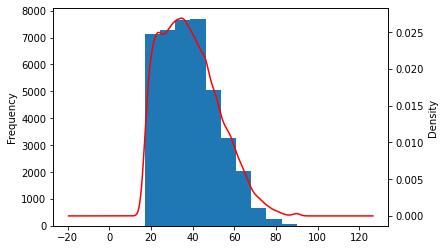

In [30]:
f,ax0 = plt.subplots()
ax1 = ax0.twinx()

data['age'].plot(kind='hist', bins=10, ax=ax0)
data['age'].plot(kind='kde', c='red', ax=ax1)

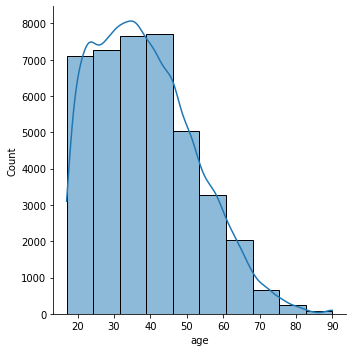

In [31]:
sns.displot(kind='hist', x='age', data=data, bins=10, kde=True)

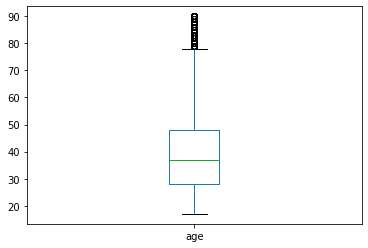

In [32]:
data['age'].plot(kind='box')

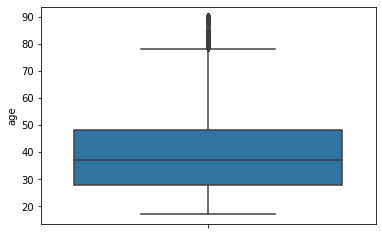

In [33]:
sns.boxplot(y="age", data=data)

# Exploring Categorical Variables

In [34]:
data['education'].head()

0     Bachelors
1     Bachelors
2       HS-grad
3          11th
4     Bachelors
Name: education, dtype: object

In [35]:
edu_vals = data['education'].unique()
edu_vals

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [36]:
len(edu_vals)

16

In [37]:
data['education'].nunique()

16

In [38]:
data['education'].value_counts()

 HS-grad         13345
 Some-college     9137
 Bachelors        6778
 Masters          2231
 Assoc-voc        1734
 11th             1542
 Assoc-acdm       1325
 10th             1172
 7th-8th           797
 Prof-school       685
 9th               628
 12th              542
 Doctorate         495
 5th-6th           420
 1st-4th           196
 Preschool          67
Name: education, dtype: int64

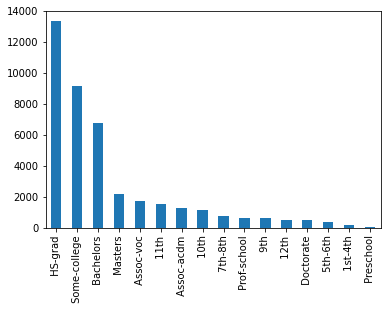

In [39]:
data['education'].value_counts().plot(kind='bar')

In [40]:
edu_values = data['education'].value_counts()
edu_values

 HS-grad         13345
 Some-college     9137
 Bachelors        6778
 Masters          2231
 Assoc-voc        1734
 11th             1542
 Assoc-acdm       1325
 10th             1172
 7th-8th           797
 Prof-school       685
 9th               628
 12th              542
 Doctorate         495
 5th-6th           420
 1st-4th           196
 Preschool          67
Name: education, dtype: int64

In [41]:
type(edu_values)

pandas.core.series.Series

In [42]:
edu_values.index

Index([' HS-grad', ' Some-college', ' Bachelors', ' Masters', ' Assoc-voc',
       ' 11th', ' Assoc-acdm', ' 10th', ' 7th-8th', ' Prof-school', ' 9th',
       ' 12th', ' Doctorate', ' 5th-6th', ' 1st-4th', ' Preschool'],
      dtype='object')

In [43]:
edu_values.values

array([13345,  9137,  6778,  2231,  1734,  1542,  1325,  1172,   797,
         685,   628,   542,   495,   420,   196,    67])

In [44]:
data.head().values

array([[1, 39, ' State-gov', ' Bachelors', 13, ' Never-married',
        ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174.0,
        0.0, 40.0, ' United-States', ' <=50K'],
       [2, 50, ' Self-emp-not-inc', ' Bachelors', 13,
        ' Married-civ-spouse', ' Exec-managerial', ' Husband', ' White',
        ' Male', 0.0, 0.0, 13.0, ' United-States', ' <=50K'],
       [3, 38, ' Private', ' HS-grad', 9, ' Divorced',
        ' Handlers-cleaners', ' Not-in-family', ' White', ' Male', 0.0,
        0.0, 40.0, ' United-States', ' <=50K'],
       [4, 53, ' Private', ' 11th', 7, ' Married-civ-spouse',
        ' Handlers-cleaners', ' Husband', ' Black', ' Male', 0.0, 0.0,
        40.0, ' United-States', ' <=50K'],
       [5, 28, ' Private', ' Bachelors', 13, ' Married-civ-spouse',
        ' Prof-specialty', ' Wife', ' Black', ' Female', 0.0, 0.0, 40.0,
        ' Cuba', ' <=50K']], dtype=object)

In [45]:
data['education'].describe()

count        41094
unique          16
top        HS-grad
freq         13345
Name: education, dtype: object

In [46]:
data['age'].max()

90

In [47]:
data['scaled_age'] = data['age']/data['age'].max()
data['scaled_age'] 

0        0.433333
1        0.555556
2        0.422222
3        0.588889
4        0.311111
           ...   
41090    0.433333
41091    0.711111
41092    0.422222
41093    0.488889
41094    0.388889
Name: scaled_age, Length: 41094, dtype: float64

## Value Counts

In [48]:
data['education'].value_counts()

 HS-grad         13345
 Some-college     9137
 Bachelors        6778
 Masters          2231
 Assoc-voc        1734
 11th             1542
 Assoc-acdm       1325
 10th             1172
 7th-8th           797
 Prof-school       685
 9th               628
 12th              542
 Doctorate         495
 5th-6th           420
 1st-4th           196
 Preschool          67
Name: education, dtype: int64

## Group By

In [49]:
data.groupby(by='education')['ID'].count()

education
 10th             1172
 11th             1542
 12th              542
 1st-4th           196
 5th-6th           420
 7th-8th           797
 9th               628
 Assoc-acdm       1325
 Assoc-voc        1734
 Bachelors        6778
 Doctorate         495
 HS-grad         13345
 Masters          2231
 Preschool          67
 Prof-school       685
 Some-college     9137
Name: ID, dtype: int64

In [50]:
data.groupby(by='education')['age'].min()

education
 10th            17
 11th            17
 12th            17
 1st-4th         22
 5th-6th         17
 7th-8th         17
 9th             17
 Assoc-acdm      19
 Assoc-voc       19
 Bachelors       19
 Doctorate       24
 HS-grad         17
 Masters         18
 Preschool       19
 Prof-school     25
 Some-college    17
Name: age, dtype: int64

In [51]:
data.groupby(by='education')['age'].max()

education
 10th            90
 11th            90
 12th            81
 1st-4th         90
 5th-6th         84
 7th-8th         90
 9th             90
 Assoc-acdm      90
 Assoc-voc       84
 Bachelors       90
 Doctorate       80
 HS-grad         90
 Masters         90
 Preschool       77
 Prof-school     90
 Some-college    90
Name: age, dtype: int64

In [52]:
data.groupby(by='education').agg({'age': ['min', 'max', 'mean', 'std', 'sum']})

age                                  
              min max       mean        std     sum
education                                          
 10th          17  90  38.000000  16.961352   44536
 11th          17  90  32.442931  15.312757   50027
 12th          17  81  32.062731  14.735616   17378
 1st-4th       22  90  47.984694  14.883988    9405
 5th-6th       17  84  43.645238  15.536096   18331
 7th-8th       17  90  49.392723  16.359194   39366
 9th           17  90  41.179936  15.978388   25861
 Assoc-acdm    19  90  37.957736  11.382250   50294
 Assoc-voc     19  84  38.540369  11.739102   66829
 Bachelors     19  90  38.945854  12.005871  263975
 Doctorate     24  80  47.111111  11.438879   23320
 HS-grad       17  90  39.170401  13.690591  522729
 Masters       18  90  43.941282  10.973047   98033
 Preschool     19  77  43.164179  15.812919    2892
 Prof-school   25  90  45.195620  12.337943   30959
 Some-college  17  90  35.587173  13.502800  325160

In [53]:
data['workclass'].head()

0            State-gov
1     Self-emp-not-inc
2              Private
3              Private
4              Private
Name: workclass, dtype: object

In [54]:
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [55]:
data.groupby(by=['education', 'workclass']).agg({'age': ['min', 'max', 'mean']})

age               
                                min max       mean
education     workclass                           
 10th          ?                 17  90  36.327869
               Federal-gov       29  71  51.076923
               Local-gov         17  76  46.326087
               Never-worked      17  18  17.500000
               Private           17  90  36.518086
...                              ..  ..        ...
 Some-college  Never-worked      20  20  20.000000
               Private           17  90  34.443757
               Self-emp-inc      18  84  44.978182
               Self-emp-not-inc  18  90  44.034202
               State-gov         18  75  34.498778

[117 rows x 3 columns]

# Formulating ML Problem to Solve

In [56]:
data.head()

,ID,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,scaled_age
0,1,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K,0.433333
1,2,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K,0.555556
2,3,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,0.422222
3,4,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K,0.588889
4,5,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K,0.311111


In [57]:
data['class'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [58]:
# <=50K -> 0
# >50K  -> 1

In [59]:
# y = f(X)

## Replace Values (Method 1)

In [60]:
data.loc[data['class']==' <=50K.', 'class'] = ' <=50K'

In [61]:
data.loc[data['class']==' >50K.', 'class'] = ' >50K'

## Replace Values (Method 2/recomended)

In [62]:
data['class'].replace(' >50K.', ' >50K')
data['class'].replace(' <=50K.', ' <=50K')

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
41090     <=50K
41091     <=50K
41092     <=50K
41093     <=50K
41094      >50K
Name: class, Length: 41094, dtype: object

In [63]:
data['class'].unique()

array([' <=50K', ' >50K'], dtype=object)

## Transform into Binary Column

In [64]:
data['y_act'] = np.where(data['class']==' >50K',1,0)

In [65]:
data[['class', 'y_act']].sample(10)

,class,y_act
1070,<=50K,0
678,<=50K,0
23595,<=50K,0
34275,<=50K,0
785,<=50K,0
19166,<=50K,0
9095,<=50K,0
22213,>50K,1
31881,<=50K,0
272,<=50K,0


In [66]:
data[['class', 'y_act']].value_counts()

class   y_act
 <=50K  0        31297
 >50K   1         9797
dtype: int64

In [67]:
data.shape[0]

41094

In [68]:
# value counts as a ratio
data[['class', 'y_act']].value_counts(normalize=True)

class   y_act
 <=50K  0        0.761595
 >50K   1        0.238405
dtype: float64

# Explore X Variables

In [69]:
data.columns

Index(['ID', 'age', 'workclass', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'class', 'scaled_age', 'y_act'],
      dtype='object')

In [70]:
data.head()

,ID,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,scaled_age,y_act
0,1,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K,0.433333,0
1,2,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K,0.555556,0
2,3,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,0.422222,0
3,4,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K,0.588889,0
4,5,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K,0.311111,0


In [71]:
data.groupby(by=['class', 'y_act']).agg({'age': ['min', 'max', 'mean', 'std']})

age                          
             min max       mean        std
class  y_act                              
 <=50K 0      17  90  36.921302  14.157086
 >50K  1      19  90  44.255282  10.564443

# Continious Variable to Categorical Variable

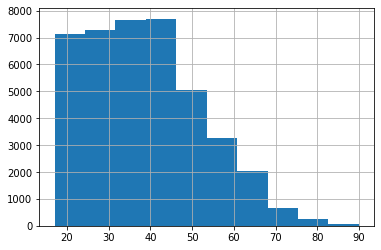

In [72]:
data['age'].hist()

In [73]:
data['age'].describe()

count    41094.000000
mean        38.669757
std         13.748166
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [74]:
data['age'].value_counts(bins=10)

(38.9, 46.2]      7700
(31.6, 38.9]      7665
(24.3, 31.6]      7271
(16.926, 24.3]    7115
(46.2, 53.5]      5031
(53.5, 60.8]      3266
(60.8, 68.1]      2040
(68.1, 75.4]       668
(75.4, 82.7]       253
(82.7, 90.0]        85
Name: age, dtype: int64

In [75]:
data['age'].value_counts(bins=10, normalize=True)

(38.9, 46.2]      0.187375
(31.6, 38.9]      0.186524
(24.3, 31.6]      0.176936
(16.926, 24.3]    0.173140
(46.2, 53.5]      0.122427
(53.5, 60.8]      0.079476
(60.8, 68.1]      0.049642
(68.1, 75.4]      0.016255
(75.4, 82.7]      0.006157
(82.7, 90.0]      0.002068
Name: age, dtype: float64

## Use `cut()` function

In [76]:
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '>60']
bin_edges = [0, 20, 30, 40, 50, 60, np.inf]

In [77]:
len(labels)

6

In [78]:
len(bin_edges)

7

In [79]:
data['age_group'] = pd.cut(x=data['age'], bins=bin_edges, labels=labels)

In [80]:
data[['age', 'age_group']].sample(10)

,age,age_group
39536,22,20-30
30478,33,30-40
5449,56,50-60
39832,30,20-30
9491,63,>60
25072,42,40-50
4304,41,40-50
554,33,30-40
37444,46,40-50
34532,43,40-50


## Exercise 1
Convert `hours_per_week` into categorical variable 

In [81]:
data['hours_per_week'].describe()

count    41094.000000
mean        40.404585
std         12.371882
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

In [82]:
data['hours_per_week'].value_counts(bins=10)

(30.4, 40.2]     22441
(40.2, 50.0]      7481
(20.6, 30.4]      2869
(10.8, 20.6]      2801
(59.8, 69.6]      2239
(50.0, 59.8]      1307
(0.901, 10.8]      947
(69.6, 79.4]       569
(79.4, 89.2]       267
(89.2, 99.0]       173
Name: hours_per_week, dtype: int64

In [83]:
# Type your code here

# Combine Values of Categorical Variables (Reduce Number of Categories)

In [84]:
data.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

# Correlation

In [85]:
correlation_matrix = data[['age',  'hours_per_week', 'education_num','y_act']].corr()
correlation_matrix

,age,hours_per_week,education_num,y_act
age,1.000000,0.072075,0.027157,0.227311
hours_per_week,0.072075,1.000000,0.141754,0.225930
education_num,0.027157,0.141754,1.000000,0.331170
y_act,0.227311,0.225930,0.331170,1.000000


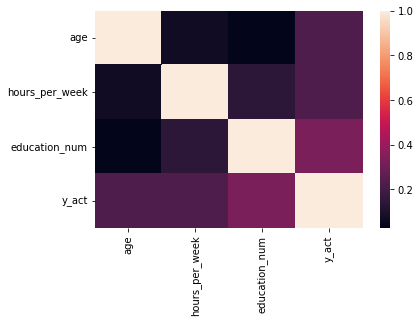

In [86]:
sns.heatmap(correlation_matrix)

# Model Building Example

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [88]:
data.columns

Index(['ID', 'age', 'workclass', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'class', 'scaled_age', 'y_act', 'age_group'],
      dtype='object')

## Identify `X` and `y`

In [89]:
X_variables = ['age',  'hours_per_week', 'education_num']
data[X_variables].head()

,age,hours_per_week,education_num
0,39,40.0,13
1,50,13.0,13
2,38,40.0,9
3,53,40.0,7
4,28,40.0,13


In [90]:
y_varibale = 'y_act'
data[y_varibale].head()

0    0
1    0
2    0
3    0
4    0
Name: y_act, dtype: int64

In [91]:
# Two classes
data[y_varibale].unique()

array([0, 1])

In [92]:
X = data[X_variables].values
X

array([[39., 40., 13.],
       [50., 13., 13.],
       [38., 40.,  9.],
       ...,
       [38., 50., 13.],
       [44., 40., 13.],
       [35., 60., 13.]])

In [93]:
y = data[y_varibale].values
y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

## Train Test Split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(F"Train sample size = {len(X_train)}")
print(F"Test sample size  = {len(X_test)}")

Train sample size = 28765
Test sample size  = 12329


## Create Logistic Regression Model
* https://en.wikipedia.org/wiki/Logistic_regression
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [95]:
model = LogisticRegression()

## Fit Model

In [96]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predict

In [97]:
model.predict_proba(X_test)

array([[0.90013482, 0.09986518],
       [0.8582601 , 0.1417399 ],
       [0.90162755, 0.09837245],
       ...,
       [0.8574348 , 0.1425652 ],
       [0.71848823, 0.28151177],
       [0.62317128, 0.37682872]])

In [98]:
# Predicted Probability for Class 1

In [99]:
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [100]:
y_pred = model.predict(X_test)

## Create Results Data Frame for Test Sample

In [101]:
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})
test_result.sample(10)

,y_act,y_pred,y_pred_prob
12226,0,0,0.018515
5169,0,0,0.239046
11466,0,0,0.155291
8272,0,0,0.094620
2938,1,1,0.533147
525,0,0,0.291852
7809,0,0,0.076289
8622,0,0,0.088491
4319,0,1,0.701535
12216,1,1,0.635194


## Confusion Matrix

In [102]:
cm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cm

y_pred,0,1,All
y_act,,,
0,8832,555,9387
1,2023,919,2942
All,10855,1474,12329


In [103]:
acuracy = (cm.loc[0,0] + cm.loc[1,1] ) / cm.loc['All','All'] 
acuracy

0.7908995052315678

<hr>
Last update 2021-10-03 by Sumudu Tennakoon